<a href="https://colab.research.google.com/github/ons13/DataProcessingProject/blob/main/data_scraping_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from requests import get
from bs4 import BeautifulSoup
from warnings import warn #importation des bibiliotheques
from time import sleep
from random import randint
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

plt.style.use('ggplot')

In [59]:
pages = np.arange(1, 100, 50)
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

titles = []
years = []
ratings = []
genres = []
runtimes = []
imdb_ratings = []
metascores = []
votes = []

for page in pages:
    session = requests.Session()
    response = session.get("https://www.imdb.com/search/title?genres=sci-fi&start=" + str(page) + "&explore=title_type,genres&ref_=adv_prv", headers=headers)

    sleep(randint(8, 15))

    if response.status_code != 200:
        warn('Request: {}; Status code: {}'.format(requests, response.status_code))

    page_html = BeautifulSoup(response.text, 'html.parser')

    mc = page_html.find_all('div', class_='sc-53c98e73-3 kttqmq')

    for c in mc:
        title = c.find('h3', class_='ipc-title__text').text.strip()
        titles.append(title)

        year = c.find('span', class_='sc-43986a27-8 jHYIIK dli-title-metadata-item').text.strip()
        years.append(year)

        rating = c.find('span', class_='sc-43986a27-8 jHYIIK dli-title-metadata-item').text.strip()
        ratings.append(rating)

        genre = c.find('span', class_='sc-43986a27-8 jHYIIK dli-title-metadata-item').text.strip()
        genres.append(genre)

        time = c.find('span', class_='sc-43986a27-8 jHYIIK dli-title-metadata-item').text.strip()
        runtimes.append(time)

        imdb_elem = c.find('span', class_='ipc-rating-star--imdb')

        if imdb_elem is not None:
            imdb_str = imdb_elem.text.strip()
            imdb_rating = float(imdb_str.split('\xa0')[0])  # Extract the rating part before '\xa0'
            imdb_ratings.append(imdb_rating)
        else:
            imdb_ratings.append(None)



        metascore_elem = c.find('span', class_='sc-b0901df4-0 bcQdDJ metacritic-score-box')

        if metascore_elem is not None:
            metascore = int(metascore_elem.text.strip())
            metascores.append(metascore)
        else:
            metascores.append(None)

        vote_elem = c.find('span', class_='ipc-rating-star--voteCount')

        if vote_elem is not None:
            vote_text = vote_elem.text.strip().replace('(', '').replace('K)', '000').replace('M)', '000000')
            try:
                vote = int(float(vote_text))  # Convert to float to handle '1.3M' format
            except ValueError:
                vote = None
            votes.append(vote)
        else:
            votes.append(None)


In [60]:
print(len(titles), len(years), len(ratings), len(genres), len(runtimes), len(imdb_ratings), len(metascores), len(votes))


100 100 100 100 100 100 100 100


In [61]:
final_df = pd.DataFrame({'movie': titles,
                       'year': years,
                       'rating': ratings,
                       'genre': genres,
                       'runtime_min': runtimes,
                       'imdb': imdb_ratings,
                       'metascore': metascores,
                       'votes': votes}
                       )

In [62]:
final_df

,movie,year,rating,genre,runtime_min,imdb,metascore,votes
0,1. Rebel Moon: Part One - A Child of Fire,2023,2023,2023,2023,5.7,32.0,59000.0
1,2. Aquaman and the Lost Kingdom,2023,2023,2023,2023,6.0,43.0,19000.0
2,3. Poor Things,2023,2023,2023,2023,8.5,86.0,13000.0
3,4. Doctor Who,2005–,2005–,2005–,2005–,8.6,NaN,242000.0
4,5. Godzilla Minus One,2023,2023,2023,2023,8.4,80.0,29000.0
...,...,...,...,...,...,...,...,...
95,46. Godzilla x Kong: The New Empire,2024,2024,2024,2024,NaN,NaN,NaN
96,47. Guardians of the Galaxy Vol. 3,2023,2023,2023,2023,7.9,64.0,356000.0
97,48. Love and Monsters,2020,2020,2020,2020,6.9,63.0,141000.0
98,49. Blade Runner 2049,2017,2017,2017,2017,8.0,81.0,640000.0


In [63]:
print(final_df.shape)

(100, 8)


In [64]:
final_df.head()

,movie,year,rating,genre,runtime_min,imdb,metascore,votes
0,1. Rebel Moon: Part One - A Child of Fire,2023,2023,2023,2023,5.7,32.0,59000.0
1,2. Aquaman and the Lost Kingdom,2023,2023,2023,2023,6.0,43.0,19000.0
2,3. Poor Things,2023,2023,2023,2023,8.5,86.0,13000.0
3,4. Doctor Who,2005–,2005–,2005–,2005–,8.6,NaN,242000.0
4,5. Godzilla Minus One,2023,2023,2023,2023,8.4,80.0,29000.0


In [65]:
final_df['metascore'].value_counts()

86.0    4
63.0    4
74.0    4
81.0    4
32.0    2
43.0    2
80.0    2
54.0    2
58.0    2
75.0    2
68.0    2
55.0    2
66.0    2
76.0    2
64.0    2
61.0    2
Name: metascore, dtype: int64

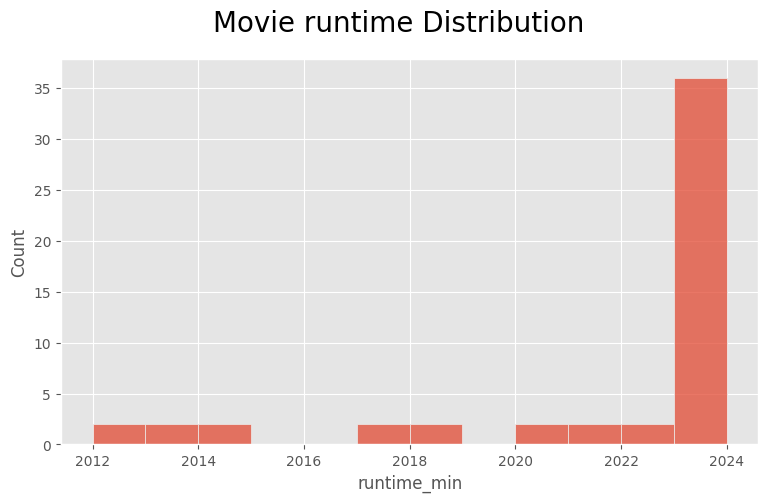

In [66]:
# Assuming '2005–' is an incorrect value, you can replace it with NaN
final_df['runtime_min'] = pd.to_numeric(final_df['runtime_min'], errors='coerce')

plt.figure(figsize=[9,5])
run = sns.histplot(final_df['runtime_min'].dropna(), kde=False)  # Use histplot for histograms
plt.suptitle("Movie runtime Distribution", fontsize=20)
plt.show()

<ipython-input-67-f12dbe9f38e0>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<function matplotlib.pyplot.show(close=None, block=None)>

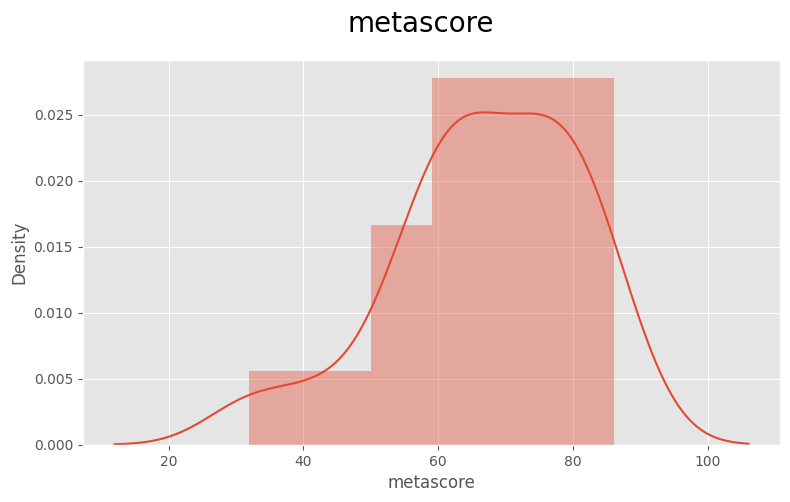

In [67]:
plt.figure(figsize=[9,5])
run=sns.distplot(final_df['metascore'])
plt.suptitle("metascore",fontsize=20)
plt.show

In [68]:
import plotly.express as px
fig = px.treemap(final_df,path=['movie'],values='imdb',color='imdb')
fig.show()

In [69]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [70]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [71]:
a = SentimentIntensityAnalyzer()

In [72]:
#polarity_testing
a.polarity_scores('i was amazed')

{'neg': 0.0, 'neu': 0.238, 'pos': 0.762, 'compound': 0.4939}

In [73]:
a.polarity_scores('he is a good player')

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

In [74]:
rt=[]
rev=[]
star=[]
reviews=[]
result=[]

In [75]:
i = get("https://www.imdb.com/title/tt6723592/reviews?ref_=tt_urv")
com = BeautifulSoup(i.text, 'html')
lcom = com.find_all('div', class_ = 'lister-item-content')
for x in lcom:

    revs= x.find('div', class_='text show-more__control').text
    reviews.append(revs)
    rate= x.span.text.replace("\n", "").replace("/10","")
    star.append(rate)
    rev.append(reviews)
    rt.append(star)

    test=a.polarity_scores(revs)
    if test['compound']>= 0.1 :
      result.append('Positive')
    elif test['compound']<= -0.1 :
      result.append('Negative')
    else :
       result.append('Neutral')

In [76]:
review_df=pd.DataFrame({'star':star,
                        'review': reviews,
                        'sentiment':result
                        })

In [77]:
review_df

,star,review,sentiment
0,7,A lot of the audience members of Tenet have co...,Positive
1,5,Those who liked 'Tenet' said it was confusing....,Positive
2,5,Following a muddlesome terrorist attack on an ...,Positive
3,5,"In simplistic manner, i would like to tell fel...",Positive
4,TxMike,Many reviewers say you have to watch this movi...,Positive
5,9,Trying to take my bias opinion away from my cr...,Positive
6,7,I'd suggest people read the synopsis on Wikipe...,Positive
7,8,I have a huge amount of respect for director C...,Positive
8,9,If you want to enjoy an intriguing and interes...,Positive
9,6,Greetings from Lithuania.I just came back from...,Negative


In [78]:
print(review_df.shape)

(25, 3)


In [79]:
review_df.head()

,star,review,sentiment
0,7,A lot of the audience members of Tenet have co...,Positive
1,5,Those who liked 'Tenet' said it was confusing....,Positive
2,5,Following a muddlesome terrorist attack on an ...,Positive
3,5,"In simplistic manner, i would like to tell fel...",Positive
4,TxMike,Many reviewers say you have to watch this movi...,Positive


In [80]:
review_df.describe(include=['object'])

,star,review,sentiment
count,25,25,25
unique,10,25,2
top,5,A lot of the audience members of Tenet have co...,Positive
freq,6,1,19


<Axes: ylabel='sentiment'>

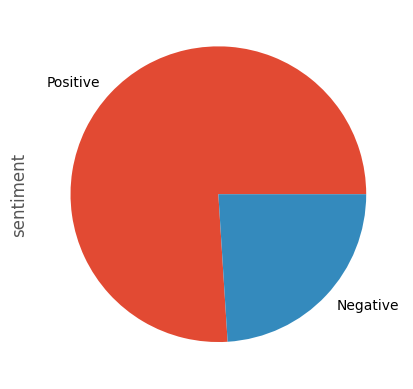

In [81]:
review_df['sentiment'].value_counts().plot(kind='pie')